Until now we have been working on similar set of data and they were all in grayscale.

We wil now move to complex datasets and imply complex models to get predictions. <br>
We will use CIFAR10 dataset which has 60k images which are all coloured and 32x32 pixels.

<img src="https://miro.medium.com/max/709/1*LyV7_xga4jUHdx4_jHk1PQ.png" style="max-width:480px">

Now, we need to import the dataset in png form. We do it by downloading the dataset from <a href="https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"> this site</a>. <br>
We will also use certain libraries to help download the dataset.

## Geting and Exploring Dataset 

In [1]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url

In [2]:
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url,".")

100.0%


In [4]:
with tarfile.open('./cifar10.tgz','r:gz') as tar:
    tar.extractall(path='./data')

In [5]:
# dataset has 50k training datsets and 10k testing datsets. To check:
data_dir = "./data/CIFAR10"
classes = os.listdir(data_dir+"/train")
os.listdir(data_dir), classes

(['test', 'train'],
 ['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'])

In [8]:
# Each class of train has 5000 images and test has 1000 images. So, 5000+1000 = 6000. And 6000*10 = 60k images.
airplane_files = os.listdir(data_dir+"/train/airplane")
len(airplane_files), airplane_files[:3] 

(5000, ['0001.png', '0002.png', '0003.png'])

In [10]:
ship_files = os.listdir(data_dir+"/test/ship")
len(ship_files), airplane_files[:3] 

(1000, ['0001.png', '0002.png', '0003.png'])

## Loading Dataset images and converting to Tensors

We use torchvision to help us load the images and then convert them to tensors. 

In [14]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [19]:
dataset = ImageFolder(data_dir+"/train", transform=ToTensor())

In [20]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

Trying to view Images

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def show_example(img,label):
    print("label:",dataset.classes[label], label)
    plt.imshow(img.permute(1,2,0))

label: airplane 0


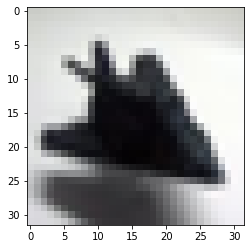

In [29]:
show_example(*dataset[0])

It is quite obv to see that this is quite difficult to determine even from the naked eye.

## Train and Validation Sets

We will be splitting the train set into train and validation sets again. But we will use a seed while randomizing indices so that we get the same train and test sets again, whenever we run it

In [30]:
import numpy as np

In [31]:
def split_indices(n, val_pct=0.1, seed=99):
    n_val = int(n*val_pct)
    np.random.seed(seed)
    idxs = np.random.permutation(n)
    return idxs[n_val:], idxs[:n_val]

In [32]:
val_pct = 0.2
rand_seed = 42

train_indices, val_indices = split_indices(len(dataset), val_pct, rand_seed)
len(train_indices), train_indices[:2], len(val_indices), val_indices[:2]

(40000, array([39087, 30893]), 10000, array([33553,  9427]))

Making Samples and DataLoaders for our train and validation indices

In [33]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [34]:
batch_size = 100

train_sample = SubsetRandomSampler(train_indices)
train_dl = DataLoader(dataset, batch_size, sampler=train_sample)

val_sample = SubsetRandomSampler(val_indices)
val_dl = DataLoader(dataset, batch_size, sampler=val_sample)

Viewing a single batch of images from train_dl

In [35]:
from torchvision.utils import make_grid

In [47]:
def show_batch(dl):
    for images, labels in dl:
        fig,ax = plt.subplots(figsize=(10,10))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images, 10).permute(1,2,0))
        break

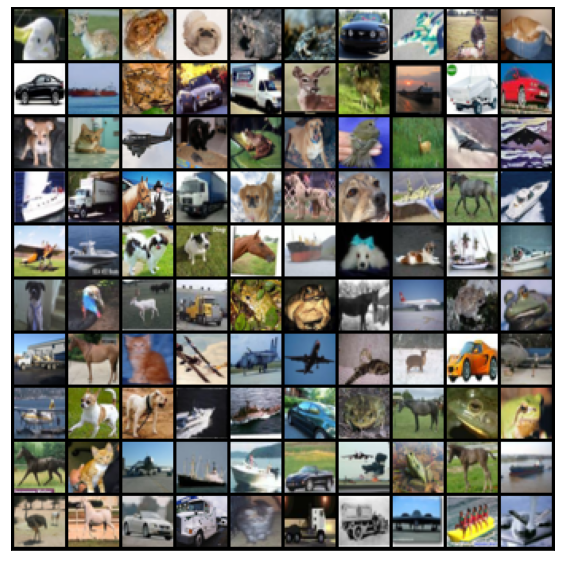

In [48]:
show_batch(train_dl)